## 1. Analyse lexicale

L'extraction des tokens de la chaîne en fonction des expressions régulières définies :  
Identifiants : position, initiale, vitesse.  
Constantes : 60.  
Opérateurs : :=, +, *.  

In [4]:
#importer le module re, qui est utilisé pour manipuler les expressions régulières (regular expressions).
import re

class SimpleLexer:
    # Règles lexicales : liste de tuples (nom du token, expression régulière)
    rules = [
        ("IDF", r"[a-zA-Z_][a-zA-Z0-9_]*"),  # Identifiant
        ("CTE", r"[0-9]+"),                 # Constante entière
        ("OP_ASSIGN", r":="),               # Opérateur d'affectation
        ("OP_ADD", r"\+"),                  # Opérateur d'addition
        ("OP_MUL", r"\*"),                  # Opérateur de multiplication
        ("WHITESPACE", r"[ \t]+"),          # Espaces (à ignorer)
    ]

    def __init__(self):
        self.tokens = []

    def tokenize(self, text):
        position = 0
        while position < len(text):
            match = None
            for token_name, token_regex in self.rules:
                regex = re.compile(token_regex)
                match = regex.match(text, position)
                if match:
                    value = match.group(0)
                    if token_name != "WHITESPACE":  # On ignore les espaces
                        self.tokens.append((token_name, value))
                    position += len(value)
                    break
            if not match:
                raise ValueError(f"Erreur lexicale : caractère inattendu '{text[position]}'")
        return self.tokens

# Tester l'analyseur lexical
lexer = SimpleLexer()
input_code = "position:= initiale ++ vitesse * 60"
tokens = lexer.tokenize(input_code)
print("Tokens lexicaux extraits :", tokens)


Tokens lexicaux extraits : [('IDF', 'position'), ('OP_ASSIGN', ':='), ('IDF', 'initiale'), ('OP_ADD', '+'), ('OP_ADD', '+'), ('IDF', 'vitesse'), ('OP_MUL', '*'), ('CTE', '60')]


## 2. Analyse Syntaxique
La définition de la grammaire
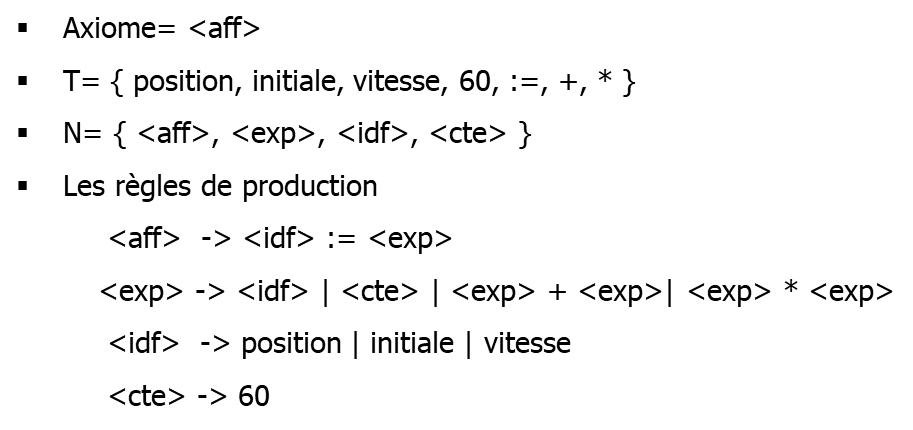

In [5]:
class SimpleParser:
    def __init__(self, tokens):
        self.tokens = tokens
        self.current_index = 0

    def current_token(self):
        if self.current_index < len(self.tokens):
            return self.tokens[self.current_index]
        return None

    def advance(self):
        self.current_index += 1

    def match(self, token_type):
        token = self.current_token()
        if token and token[0] == token_type:
            self.advance()
            return True
        return False

    def parse(self):
        return self.parse_assignment()

    def parse_assignment(self):
        # Règle : <S> ::= <IDF> ":=" <EXP>
        if self.match("IDF") and self.match("OP_ASSIGN") and self.parse_expression():
            return True
        print("Erreur syntaxique : affectation invalide.")
        return False

    def parse_expression(self):
        # Règle : <EXP> ::= <EXP> "+" <EXP> | <EXP> "*" <EXP> | <IDF> | <CTE>
        if self.parse_term():
            while self.match("OP_ADD"):  # Gestion des opérations +
                if not self.parse_term():
                    print("Erreur syntaxique : opérande manquant après '+'.")
                    return False
            return True
        return False

    def parse_term(self):
        # Gestion des termes pour * ou valeurs simples
        if self.parse_factor():
            while self.match("OP_MUL"):  # Gestion des opérations *
                if not self.parse_factor():
                    print("Erreur syntaxique : opérande manquant après '*'.")
                    return False
            return True
        return False

    def parse_factor(self):
        # Règle : <FACTOR> ::= <IDF> | <CTE>
        if self.match("IDF") or self.match("CTE"):
            return True
        print("Erreur syntaxique : facteur attendu.")
        return False

# Tester l'analyseur syntaxique
parser = SimpleParser(tokens)
if parser.parse():
    print("Analyse syntaxique réussie.")
else:
    print("Analyse syntaxique échouée.")


Erreur syntaxique : facteur attendu.
Erreur syntaxique : opérande manquant après '+'.
Erreur syntaxique : affectation invalide.
Analyse syntaxique échouée.
